# Lab 01, Experiment - 2
(Just run the Run All Command, all output will be again reappeared)

# Part (a)  ---- Converting the ASCII sequence "Test" to bit stream and plotting it and then creating a MyTest.wav file with MyTest as ASCII characters

In [1]:
%matplotlib inline

# Completing the ascfun.py code to generate bit stream

In [2]:
# %load ascfun
# Functions for conversion between ASCII and bits

from pylab import *

def asc2bin(txt,bits=8):
	"""
	ASCII text to serial binary conversion
	>>>> dn = asc2bin(txt, bits8) <<<<
	where txt 		input text string
	abs(bits)		bits per character
	bits > 0		LSB first parallel to serial
	bits < 0		MSB first parallel to serial
	dn			binary output sequence
	"""
	
	txtnum = array([ord(c) for c in txt])    # changing text character to it's ascii value
	if bits > 0:
		p2 = np.power(2.0,arange(0,-bits,-1))   # making an array of decreasing exponential of 2
	else:
		p2 = np.power(2.0,1+arange(bits,0))	 # making an array of increasing exponential of 2

	B = array(mod(array(floor(outer(txtnum,p2)),int),2),int8) 	# a matrix containing the vector of bits of each character as a row
	dn = reshape(B,B.size)
	return dn		# serial binary output

def bin2asc(dn, bits=8, flg=1):
	"""
	Serial binary to ASCII text conversion
	>>>> txt = bin2asc(dn, bits, flg) <<<<
        where dn 		binary input sequence
	abs(bits)               bits per character
        bits > 0                LSB first parallel to serial
        bits < 0                MSB first parallel to serial
	flg != 0		limit range to [0...127]
	txt 			output text string
	"""
	
	C = array(reshape(dn,(dn.size/8,8)),int)
	
	if bits > 0:
		p2 = np.power(2,arange(0,bits)).T 	 # making an array of increasing exponential of 2
	else:
		p2 = np.power(2,arange(bits,0,-1)-1).T 		# making an array of increasing exponential of 2

	num4txt = dot(C,p2)				# making an array of ASCII code from the binary coded characters
	txt = ''.join([chr(c) for c in num4txt])	# making a list of txt character and then joining it to make the required text
	return txt	
	


# Generating a code titled ftpam01.py and generating the bit stream of ASCII characters "Test"

(-0.2, 1.2)

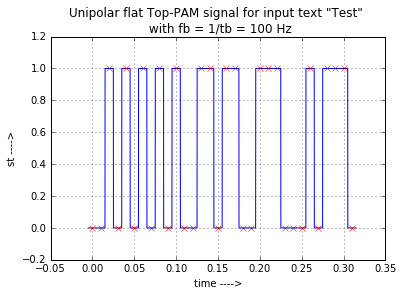

In [3]:
# This program will accpet the text string and convert
# it into flat top PAM s(t) signal.

from pylab import *
from ascfun import *
import wavfun as wf

#txt = input("Enter the text: ")
txt='Test'                          # the required input is "Test"
fs = 44100
fb = 100
tb = 1/float(fb)

dn = asc2bin(txt)   # as2bin will change the txt to stream of bits
n=len(dn) 	# length of dn sequence
ixl = round(-0.5*tb*fs) 	# the starting left index of the st
ixr = round((n-0.5)*fs*tb)	# the right most index of the st
tt = arange(ixl,ixr)/float(fs)  # time axis for st


# making differtial of the sequence and the integrating it

dnt = diff(hstack((0,dn)))*fs    # taking differential of dn

ddnt=[]
for i in dnt:       # adding zeros in between two dn bits 
	ddnt = ddnt + [i] + list(zeros(round(tb*fs)-1)) 


ddnt_prime = array(ddnt)   	# changing list into numpy array
st = cumsum(ddnt_prime)/float(fs)      # integrating the differential of st to get st

# Plotting the st

plot(tt, st,'-b',arange(0,n)/float(fb),dn,'xr')
grid()
xlabel('time ---->')
ylabel('st ---->')
title('Unipolar flat Top-PAM signal for input text "%s" \n with fb = 1/tb = %s Hz' %(txt,fb))
ylim([-0.2,1.2])



# Now generating a MyTest.wav file for input "MyTest"

In [4]:
# This program will accpet the text string and convert
# it into flat top PAM s(t) signal.

from pylab import *
from ascfun import *
import wavfun as wf

#txt = input("Enter the text: ")
txt='MyTest'                          # the required input is "Test"
fs = 44100
fb = 100
tb = 1/float(fb)

dn = asc2bin(txt)   # as2bin will change the txt to stream of bits
n=len(dn) 	# length of dn sequence
ixl = round(-0.5*tb*fs) 	# the starting left index of the st
ixr = round((n-0.5)*fs*tb)	# the right most index of the st
tt = arange(ixl,ixr)/float(fs)  # time axis for st


# making differtial of the sequence and the integrating it

dnt = diff(hstack((0,dn)))*fs    # taking differential of dn

ddnt=[]
for i in dnt:       # adding zeros in between two dn bits 
	ddnt = ddnt + [i] + list(zeros(round(tb*fs)-1)) 


ddnt_prime = array(ddnt)   	# changing list into numpy array
st = cumsum(ddnt_prime)/float(fs)      # integrating the differential of st to get st

wf.wavwrite(0.999*st/float(max(abs(st))),fs,'MyTest.wav')    # Write wav-file


# After running the above code, MyTest.wav file has been created in the working directory

# Part (b) 

# Generating the content of MyTest.wav file by creating a ftpam_rcvr01.py code

In [5]:
# File: ftpam_rcvr01.py
# Script file that accepts a binary unipolar flat top PAM
# signal r(t) with bitrate fb and sampling rate fs
# as input and decodes it into a received text string.
# The PAM signal r(t) is received from a wav-file with
# sampling rate fs. First r(t) is sampled at the right DT sequence 
# sampling times, spaced tb = 1/fb apart. The result is then 
# quantized to binary (0 or 1) to form the 
# estimated received sequence dnhat which is subsequently
# converted to 8 bit ASCII text.

from pylab import *
import ascfun as af
import wavfun as wf
#filename = input("Enter the file name (wav): ")
rt, fs = wf.wavread("MyTest.wav")

fb = 100 
tb = 1/float(fb)

bits = 8
n = int(floor(len(rt)/float(fs)/tb)) 	# number of received bits

rt = list(rt)  	# changing rt into list type
comp_val = (max(rt) + min(rt))/2.0 	# taking mid value for estimation

######### getting sample of rt signal #######

dnhat=[]
for i in range(n):
	d_prime = rt[i*round(fs*tb):(i+1)*round(fs*tb)]
	avg = sum(d_prime) / round(fs*tb)     # averaging out the one bit window and the comapring
	if avg > 0.5:
		dnhat = dnhat + [1]
	else:
		dnhat = dnhat + [0]

#####################################################
dnhat = array(dnhat,int8)	 # converting list into binary array

print("")
print('The content of the wav file is "%s"' %af.bin2asc(dnhat))
print("")




The content of the wav file is "MyTest"



# By running the above code with file input as "MyTest.wav", we found that the text decoded is "MyTest"

# Now trying to decode the text content of file ftpam_sig01.wav using the same python code ftpam_rcvr01.py 

In [2]:
# File: ftpam_rcvr01.py
# Script file that accepts a binary unipolar flat top PAM
# signal r(t) with bitrate fb and sampling rate fs
# as input and decodes it into a received text string.
# The PAM signal r(t) is received from a wav-file with
# sampling rate fs. First r(t) is sampled at the right DT sequence 
# sampling times, spaced tb = 1/fb apart. The result is then 
# quantized to binary (0 or 1) to form the 
# estimated received sequence dnhat which is subsequently
# converted to 8 bit ASCII text.

from pylab import *
import ascfun as af
import wavfun as wf
#filename = input("Enter the file name (wav): ")
rt, fs = wf.wavread("ftpam_sig01.wav")

fb = 100                                         # Given in the question
tb = 1/float(fb)

bits = 8
n = int(floor(len(rt)/float(fs)/tb)) 	# number of received bits

rt = list(rt)  	# changing rt into list type
comp_val = (max(rt) + min(rt))/2.0 	# taking mid value for estimation

######### getting sample of rt signal #######

dnhat=[]
for i in range(n):
	d_prime = rt[i*round(fs*tb):(i+1)*round(fs*tb)]
	avg = sum(d_prime) / round(fs*tb)     # averaging out the one bit window and the comapring
	if avg > 0.5:
		dnhat = dnhat + [1]
	else:
		dnhat = dnhat + [0]

#####################################################
dnhat = array(dnhat,int8)	 # converting list into binary array

print("")
print('The content of the wav file is "%s"' %af.bin2asc(dnhat))
print("")




The content of the wav file is "Networking"



# We decoded the text content of file ftpam_sig01.wav using the same python code ftpam_rcvr01.py and the text is "Networking" 

# Part (c)

# To find the bit rate of file ftpam_sig02.wav and decode the text content of the same along with the noise corrupted file ftpam_sig03.wav using the same noise robust code "ftpam_rcvr01.py"

# Below is the code to find the approx bit rate of file ftpam_sig02.wav

In [7]:
# %load to_find_bit_rate.py
from pylab import *
import ascfun as af
import wavfun as wf
###filename = input("Enter the file name (wav): ")
rt, fs = wf.wavread("ftpam_sig02.wav")
bits = 8
#n = int(floor(len(rt)/float(fs)/tb)) 	

dn=[]
comp_val = (max(rt) + min(rt))/2.0
for j in rt:
	if j > comp_val:
		dn = dn + [1]
	else:
		dn = dn + [0]


k=dn[0]
n=0
lst=[]

# This will count consecutive zeros or ones in the bit stream sequence of file
# and the bit rate will be fs divided by the minimum of this count

for i in dn:
	if k == i:
		n=n+1
		continue
	else:
		k=i
		lst = lst + [n]
		n=0


print("The approx. bit rate is below ")
print(fs/min(lst))


The approx. bit rate is below 
302.05479452054794


# After careful calculation and manipulation, we found that the working bit rate is actually equal to 300 Hz. Using this bit rate, we will try to decode the text in this file.

In [5]:
# File: ftpam_rcvr01.py
# Script file that accepts a binary unipolar flat top PAM
# signal r(t) with bitrate fb and sampling rate fs
# as input and decodes it into a received text string.
# The PAM signal r(t) is received from a wav-file with
# sampling rate fs. First r(t) is sampled at the right DT sequence 
# sampling times, spaced tb = 1/fb apart. The result is then 
# quantized to binary (0 or 1) to form the 
# estimated received sequence dnhat which is subsequently
# converted to 8 bit ASCII text.

from pylab import *
import ascfun as af
import wavfun as wf
#filename = input("Enter the file name (wav): ")
rt, fs = wf.wavread("ftpam_sig02.wav")

fb = 300                                         # Given in the question
tb = 1/float(fb)

bits = 8
n = int(floor(len(rt)/float(fs)/tb)) 	# number of received bits

rt = list(rt)  	# changing rt into list type
comp_val = (max(rt) + min(rt))/2.0 	# taking mid value for estimation

######### getting sample of rt signal #######

dnhat=[]
for i in range(n):
	d_prime = rt[i*round(fs*tb):(i+1)*round(fs*tb)]
	avg = sum(d_prime) / round(fs*tb)     # averaging out the one bit window and the comapring
	if avg > 0.5:
		dnhat = dnhat + [1]
	else:
		dnhat = dnhat + [0]

#####################################################
dnhat = array(dnhat,int8)	 # converting list into binary array

print("")
print('The content of the wav file is "%s"' %af.bin2asc(dnhat))
print("")




The content of the wav file is "Who is Tuna "Phish"?"



In [6]:
len(dnhat)

160

# We found that the text encoded into the ftpam_sig02.wav file is "Who is Tuna "Phish"?" and the bit rate is 300 Hz.

# Now we will try to decode the content of file ftpam_sig03.wav containing noise using the same code. Given bit rate is given as 100 Hz.

In [9]:
# File: ftpam_rcvr01.py
# Script file that accepts a binary unipolar flat top PAM
# signal r(t) with bitrate fb and sampling rate fs
# as input and decodes it into a received text string.
# The PAM signal r(t) is received from a wav-file with
# sampling rate fs. First r(t) is sampled at the right DT sequence 
# sampling times, spaced tb = 1/fb apart. The result is then 
# quantized to binary (0 or 1) to form the 
# estimated received sequence dnhat which is subsequently
# converted to 8 bit ASCII text.

from pylab import *
import ascfun as af
import wavfun as wf
#filename = input("Enter the file name (wav): ")
rt, fs = wf.wavread("ftpam_sig03.wav")

fb = 100                                         # Given in the question
tb = 1/float(fb)

bits = 8
n = int(floor(len(rt)/float(fs)/tb)) 	# number of received bits

rt = list(rt)  	# changing rt into list type
comp_val = (max(rt) + min(rt))/2.0 	# taking mid value for estimation

######### getting sample of rt signal #######

dnhat=[]
for i in range(n):
	d_prime = rt[i*round(fs*tb):(i+1)*round(fs*tb)]
	avg = sum(d_prime) / round(fs*tb)     # averaging out the one bit window and the comapring
	if avg > 0.5:
		dnhat = dnhat + [1]
	else:
		dnhat = dnhat + [0]

#####################################################
dnhat = array(dnhat,int8)	 # converting list into binary array

print("")
print('The content of the wav file is "%s"' %af.bin2asc(dnhat))
print("")




The content of the wav file is "Cosmic Dustbuster"



# We found that the text encoded into the ftpam_sig03.wav file is "Cosmic Dustbuster".